Initial Weights:
 [[0.28203457 0.17743954]
 [0.75061475 0.80683474]
 [0.99050514 0.41261768]] 

Epoch 1
  Distances: [2.78238372 2.0400194  2.09012168]
  Winner (WTA): 1
 Sample 1: [2.49671415 1.8617357 ] -> Winner Neuron: 1
  Updated Weights:
[[0.28203457 0.17743954]
 [1.62366445 1.33428522]
 [0.99050514 0.41261768]]

  Distances: [4.09747401 2.41644955 3.52433267]
  Winner (WTA): 1
 Sample 2: [2.64768854 3.52302986] -> Winner Neuron: 1
  Updated Weights:
[[0.28203457 0.17743954]
 [2.1356765  2.42865754]
 [0.99050514 0.41261768]]

  Distances: [2.17365761 0.7589932  1.55962413]
  Winner (WTA): 1
 Sample 3: [1.76584663 1.76586304] -> Winner Neuron: 1
  Updated Weights:
[[0.28203457 0.17743954]
 [1.95076156 2.09726029]
 [0.99050514 0.41261768]]

  Distances: [4.19278659 1.76096203 3.49951008]
  Winner (WTA): 1
 Sample 4: [3.57921282 2.76743473] -> Winner Neuron: 1
  Updated Weights:
[[0.28203457 0.17743954]
 [2.76498719 2.43234751]
 [0.99050514 0.41261768]]

  Distances: [2.67442047 1.2

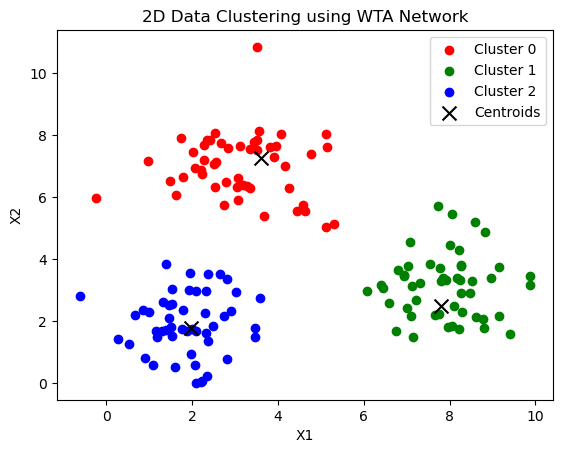

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class WTA:
    def winner(self, weights, sample):
        distances = np.linalg.norm(weights - sample, axis=1)
        print("  Distances:", distances)
        winner_index = np.argmin(distances)
        print("  Winner (WTA):", winner_index)
        return winner_index

    def update_wta(self, weights, sample, winner, alpha):
        weights[winner] += alpha * (sample - weights[winner])
        return weights

def main():
    np.random.seed(42)
    X1 = np.random.randn(50, 2) + np.array([2, 2])
    X2 = np.random.randn(50, 2) + np.array([8, 3])
    X3 = np.random.randn(50, 2) + np.array([3, 7])
    X = np.vstack((X1, X2, X3))
   
    n_clusters = 3
    alpha = 0.5
    epochs = 2
    # Initialize cluster centroids randomly
    weights = np.random.rand(n_clusters, 2)
   
    ob = WTA()
    print("Initial Weights:\n", weights, "\n")
   
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}")
        for idx, sample in enumerate(X):
            winner = ob.winner(weights, sample)
            weights = ob.update_wta(weights, sample, winner, alpha)
            print(f" Sample {idx + 1}: {sample} -> Winner Neuron: {winner}")
            print(f"  Updated Weights:\n{weights}\n")
        alpha *= 0.9
        print(f" Learning Rate after epoch {epoch + 1}: {alpha}\n")
   
    # Assign clusters to each sample
    clusters = []
    for sample in X:
        winner = ob.winner(weights, sample)
        clusters.append(winner)
    clusters = np.array(clusters)
   
    # Visualization
    colors = ['r', 'g', 'b']
    for i in range(n_clusters):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(weights[:,0], weights[:,1], c='k', marker='x', s=100, label='Centroids')
    plt.title("2D Data Clustering using WTA Network")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()